In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores

from transformers import MusicgenForConditionalGeneration

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../_data/fig-symmetry-audio-models/MusicGen-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [6]:
path = ["decoder.model.decoder.layers[", "].self_attn.q_proj.weight", "].self_attn.k_proj.weight"]

'MusicGen small (l = 24, d = 1024, h = 16 ; 300M parameters)'
dh = 64
l = 24
d = 1024
h = d // dh

model = MusicgenForConditionalGeneration.from_pretrained("facebook/musicgen-small")
score_List= get_scores(d, l, h, dh, model, path)
models['MusicGen-small'] = [l, d, h, dh, score_List]

'MusicGen medium (l = 48, d = 1536, h = 24 ; 1.5b parameters)'
dh = 64
l = 48
d = 1536
h = d // dh

model = MusicgenForConditionalGeneration.from_pretrained("facebook/musicgen-medium")
score_List= get_scores(d, l, h, dh, model, path)
models['MusicGen-medium'] = [l, d, h, dh, score_List]

'MusicGen large (l = 48, d = 2048, h = 32 ; 3.3b parameters)'
dh = 64
l = 48
d = 2048
h = d // dh

model = MusicgenForConditionalGeneration.from_pretrained("facebook/musicgen-large")
score_List= get_scores(d, l, h, dh, model, path)
models['MusicGen-large'] = [l, d, h, dh, score_List]

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/torch/nn/utils/weight_norm.py:30: UserWarning: torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.
  warnings.warn("torch.nn.utils.weight_norm is deprecated in favor of torch.nn.utils.parametrizations.weight_norm.")


In [7]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

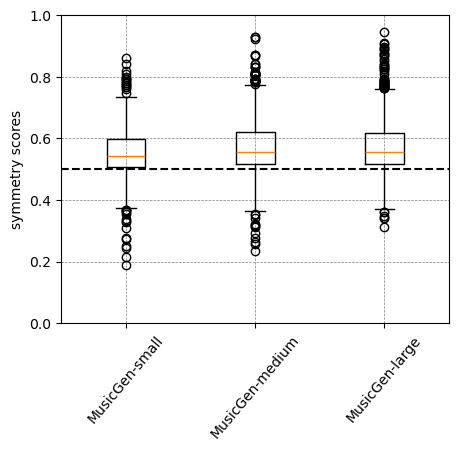

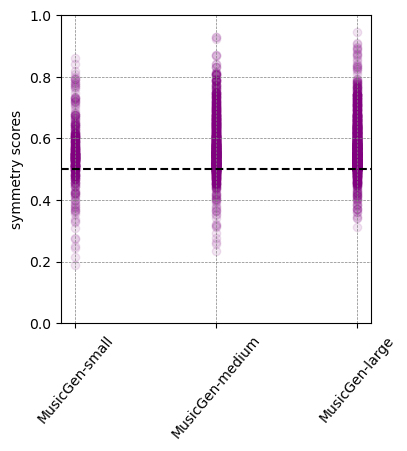

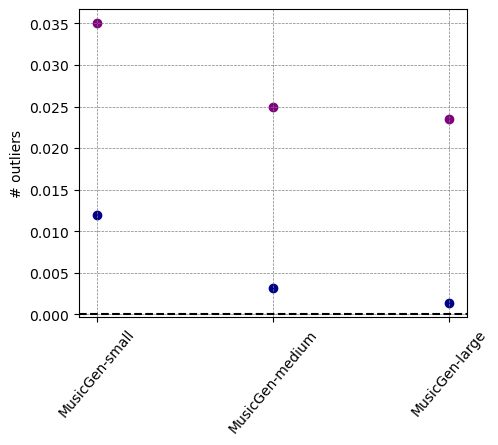

In [8]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)